# Loading the Data

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("train.csv")

In [2]:
#Taking a look at the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Isolating the targets of the traning data
TrainClassLabel = df['Survived']

# Preparing the trainingdata

In [4]:
#Dividing the Sex column into two new binary categories
Male = []
Female = []
for i in df['Sex']:
    if i == 'male':
        Male.append(1)
        Female.append(0)
    if i == 'female':
        Male.append(0)
        Female.append(1)

In [5]:
#Dividing the Pclass attribute into three new binary categories
Pclass1 = []
Pclass2 = []
Pclass3 = []
for i in df['Pclass']:
    if i == 1:
        Pclass1.append(1)
        Pclass2.append(0)
        Pclass3.append(0)
    if i == 2:
        Pclass1.append(0)
        Pclass2.append(1)
        Pclass3.append(0)
    if i == 3:
        Pclass1.append(0)
        Pclass2.append(0)
        Pclass3.append(1)

In [6]:
age = df['Age']
ageMean = age.mean() #used for missing data

#new categories:
Infant = []
Child = []
Teenager = []
YoungAdult = []
Adult = []
Senior = []



for i in range(len(age)):
    if np.isnan(age[i]): #if nan then it gets the mean age
        age.iloc[i] = ageMean


for i in age:
    if i < 2: #infant
        Infant.append(1)
        Child.append(0)
        Teenager.append(0)
        YoungAdult.append(0)
        Adult.append(0)
        Senior.append(0)
    if 2 <= i < 13: #child
        Infant.append(0)
        Child.append(1)
        Teenager.append(0)
        YoungAdult.append(0)
        Adult.append(0)
        Senior.append(0)
    if 13 <= i < 20: #Teenager:
        Infant.append(0)
        Child.append(0)
        Teenager.append(1)
        YoungAdult.append(0)
        Adult.append(0)
        Senior.append(0)
    if 20 <= i < 35: #YoungAdult
        Infant.append(0)
        Child.append(0)
        Teenager.append(0)
        YoungAdult.append(1)
        Adult.append(0)
        Senior.append(0)
    if 35 <= i < 65: #Adult
        Infant.append(0)
        Child.append(0)
        Teenager.append(0)
        YoungAdult.append(0)
        Adult.append(1)
        Senior.append(0)
    if i >= 65: #Senior
        Infant.append(0)
        Child.append(0)
        Teenager.append(0)
        YoungAdult.append(0)
        Adult.append(0)
        Senior.append(1)
    

C:\Users\Simon\Anaconda2\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [7]:
#Finding unique values from the SibSp category
print pd.Series.unique(df['SibSp'])

#creates binary categories for this data set
SibSpResults = []
for r in range(9):
    temp = []
    for i in df['SibSp']:
        if i == r:
            temp.append(1)
        else:
            temp.append(0)
    
    SibSpResults.append(temp)
    

[1 0 3 4 2 5 8]


In [8]:
pd.Series.unique(df['Parch'])

#creates binary categories for this data set
ParchResults = []
for r in range(7):
    temp = []
    for i in df['Parch']:
        if i == r:
            temp.append(1)
        else:
            temp.append(0)
    
    ParchResults.append(temp)
    


In [9]:
fareMax =  pd.Series.max(df['Fare'])+1
farePortion = fareMax/5

fareResults = []
for r in range(1,6,1):
    temp = []
    Min = (r-1)*farePortion
    Max = r*farePortion
    for i in df['Fare']:
        
        if Min <= i < Max:
            temp.append(1)
        else:
            temp.append(0)
            
    fareResults.append(temp)

In [10]:
#investigates the Embarked category
embarked = df['Embarked']
print embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [11]:
#Since S is the most prominent nan values get assigned to this:
newEmbarked = []
for i in embarked:
    if not isinstance(i, (str, unicode)):
        newEmbarked.append('S')
    else:
        newEmbarked.append(i)

#Then binary categories are created:
cat  = ['S', 'C', 'Q']
embarkedResults=[]
for r in range(3):
    temp = []
    for i in newEmbarked:
        if i == cat[r]:
            temp.append(1)
        else:
            temp.append(0)
            
    embarkedResults.append(temp)

In [12]:
#Creating a new dataframe with the new categories
dfTrain = pd.DataFrame()
dfTrain['Male'] = Male
dfTrain['Female'] = Female
dfTrain['Pclass1'] = Pclass1
dfTrain['Pclass2'] = Pclass2
dfTrain['Pclass3'] = Pclass3
dfTrain['Infant'] = Infant
dfTrain['Child'] = Child
dfTrain['Teenager'] = Teenager
dfTrain['YoungAdult'] = YoungAdult
dfTrain['Adult'] = Adult
dfTrain['Senior'] = Senior
for i in range(len(SibSpResults)):
    columnName = 'SibSp' + str(i)
    dfTrain[columnName] = SibSpResults[i]
    
#Since SibSp6 and 7 only contain zeros they are dropped:
dfTrain = dfTrain.drop('SibSp6', 1)
dfTrain = dfTrain.drop('SibSp7', 1)

for i in range(len(ParchResults)):
    columnName = 'Parch' + str(i)
    dfTrain[columnName] = ParchResults[i]
    
for i in range(len(fareResults)):
    columnName = 'Fare' + str(i)
    dfTrain[columnName] = fareResults[i]
    
    
for i in range(len(embarkedResults)):
    columnName = 'Embarked' + str(i)
    dfTrain[columnName] = embarkedResults[i]

In [13]:
dfTrain.head()


,Male,Female,Pclass1,Pclass2,Pclass3,Infant,Child,Teenager,YoungAdult,Adult,...,Parch5,Parch6,Fare0,Fare1,Fare2,Fare3,Fare4,Embarked0,Embarked1,Embarked2
0,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
1,0,1,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,0,1,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
3,0,1,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
4,1,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0


# Doing the same for the test data

In [14]:
df = pd.read_csv("test.csv")
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [15]:
#Dividing the Sex column into two new binary categories
Male = []
Female = []
for i in df['Sex']:
    if i == 'male':
        Male.append(1)
        Female.append(0)
    if i == 'female':
        Male.append(0)
        Female.append(1)

In [16]:
#Dividing the Pclass attribute into three new binary categories
Pclass1 = []
Pclass2 = []
Pclass3 = []
for i in df['Pclass']:
    if i == 1:
        Pclass1.append(1)
        Pclass2.append(0)
        Pclass3.append(0)
    if i == 2:
        Pclass1.append(0)
        Pclass2.append(1)
        Pclass3.append(0)
    if i == 3:
        Pclass1.append(0)
        Pclass2.append(0)
        Pclass3.append(1)

In [17]:
age = df['Age']

#new categories:
Infant = []
Child = []
Teenager = []
YoungAdult = []
Adult = []
Senior = []



for i in range(len(age)):
    if np.isnan(age[i]): #if nan then it gets the mean age
        age.iloc[i] = ageMean


for i in age:
    if i < 2: #infant
        Infant.append(1)
        Child.append(0)
        Teenager.append(0)
        YoungAdult.append(0)
        Adult.append(0)
        Senior.append(0)
    if 2 <= i < 13: #child
        Infant.append(0)
        Child.append(1)
        Teenager.append(0)
        YoungAdult.append(0)
        Adult.append(0)
        Senior.append(0)
    if 13 <= i < 20: #Teenager:
        Infant.append(0)
        Child.append(0)
        Teenager.append(1)
        YoungAdult.append(0)
        Adult.append(0)
        Senior.append(0)
    if 20 <= i < 35: #YoungAdult
        Infant.append(0)
        Child.append(0)
        Teenager.append(0)
        YoungAdult.append(1)
        Adult.append(0)
        Senior.append(0)
    if 35 <= i < 65: #Adult
        Infant.append(0)
        Child.append(0)
        Teenager.append(0)
        YoungAdult.append(0)
        Adult.append(1)
        Senior.append(0)
    if i >= 65: #Senior
        Infant.append(0)
        Child.append(0)
        Teenager.append(0)
        YoungAdult.append(0)
        Adult.append(0)
        Senior.append(1)
    

In [18]:
#Finding unique values from the SibSp category
pd.Series.unique(df['SibSp'])

#creates binary categories for this data set
SibSpResults = []
for r in range(9):
    temp = []
    for i in df['SibSp']:
        if i == r:
            temp.append(1)
        else:
            temp.append(0)
    
    SibSpResults.append(temp)
    

In [19]:
pd.Series.unique(df['Parch'])

#creates binary categories for this data set
ParchResults = []
for r in range(7):
    temp = []
    for i in df['Parch']:
        if i == r:
            temp.append(1)
        else:
            temp.append(0)
    
    ParchResults.append(temp)
    


In [20]:
fareMax =  pd.Series.max(df['Fare'])+1
farePortion = fareMax/5

fareResults = []
for r in range(1,6,1):
    temp = []
    Min = (r-1)*farePortion
    Max = r*farePortion
    for i in df['Fare']:
        
        if Min <= i < Max:
            temp.append(1)
        else:
            temp.append(0)
            
    fareResults.append(temp)

In [21]:
#investigates the Embarked category
embarked = df['Embarked']
print embarked.value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64


In [22]:
#Since S is the most prominent nan values get assigned to this:
newEmbarked = []
for i in embarked:
    if not isinstance(i, (str, unicode)):
        newEmbarked.append('S')
    else:
        newEmbarked.append(i)

#Then binary categories are created:
cat  = ['S', 'C', 'Q']
embarkedResults=[]
for r in range(3):
    temp = []
    for i in newEmbarked:
        if i == cat[r]:
            temp.append(1)
        else:
            temp.append(0)
            
    embarkedResults.append(temp)

In [23]:
#Creating a new dataframe with the new categories
dfTest = pd.DataFrame()
dfTest['Male'] = Male
dfTest['Female'] = Female
dfTest['Pclass1'] = Pclass1
dfTest['Pclass2'] = Pclass2
dfTest['Pclass3'] = Pclass3
dfTest['Infant'] = Infant
dfTest['Child'] = Child
dfTest['Teenager'] = Teenager
dfTest['YoungAdult'] = YoungAdult
dfTest['Adult'] = Adult
dfTest['Senior'] = Senior
for i in range(len(SibSpResults)):
    columnName = 'SibSp' + str(i)
    dfTest[columnName] = SibSpResults[i]
    
#Since SibSp6 and 7 only contain zeros they are dropped:
dfTest = dfTest.drop('SibSp6', 1)
dfTest = dfTest.drop('SibSp7', 1)

for i in range(len(ParchResults)):
    columnName = 'Parch' + str(i)
    dfTest[columnName] = ParchResults[i]
    
for i in range(len(fareResults)):
    columnName = 'Fare' + str(i)
    dfTest[columnName] = fareResults[i]
    
    
for i in range(len(embarkedResults)):
    columnName = 'Embarked' + str(i)
    dfTest[columnName] = embarkedResults[i]

dfTest.head()


,Male,Female,Pclass1,Pclass2,Pclass3,Infant,Child,Teenager,YoungAdult,Adult,...,Parch5,Parch6,Fare0,Fare1,Fare2,Fare3,Fare4,Embarked0,Embarked1,Embarked2
0,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,1,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,0,1,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0


# Creating the random forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier


X = dfTrain
y = TrainClassLabel
classifier = RandomForestClassifier(n_estimators = 100)
classifier = classifier.fit(X, y)


In [25]:
predictions = classifier.predict(dfTest)

In [26]:
passengerID = range(892,1310)
dfPred = pd.DataFrame()
dfPred['PassengerID'] = passengerID
dfPred['Survived'] = predictions


In [27]:
X = dfTrain
y = TrainClassLabel
testData = dfTest

In [28]:
#Writing a program that creates a Random Forsest, finds the worst feature and pops it, 
#then creates a new model, predict y and exports the result
def backFeatSelCSV(X, y, testData, iterations):
    for i in range(iterations):
        # Build a forest and compute the feature importances
        forest = ExtraTreesClassifier(n_estimators=250,
                                      random_state=0)

        forest.fit(X, y)
        importances = forest.feature_importances_
        std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                     axis=0)
        indices = np.argsort(importances)[::-1]

        
        #finding the least important feature to be removed
        cutList = indices[-1:]
        
        #Droping the feature from the training data
        X = X.drop(X.columns[cutList], axis=1)
        
        #Dropping it from the test data
        testData = testData.drop(testData.columns[cutList] , axis=1)
        
        #Creates fits the model again with the new features
        forest.fit(X, y)
        
        #Classifing the test data
        predictions = forest.predict(testData)
        
        
        #Creating the output CSV
        passengerID = range(892,1310)
        dfPred = pd.DataFrame()
        dfPred['PassengerID'] = passengerID
        dfPred['Survived'] = predictions
        csvName = 'bfsVersion' + str(i)+ '.csv'
        dfPred.to_csv(csvName, index=False)
    
    

In [29]:
#Running the above program
backFeatSelCSV(X, y, testData, 20)

# Concluding on the Number of Features

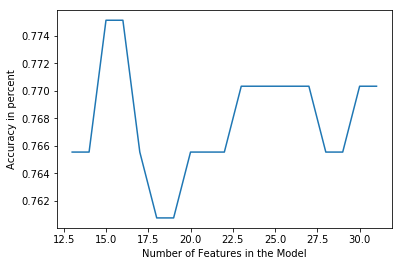

In [30]:
#test-scores from the Kaggle website
testScores = [0.77033,0.77033,0.76555,0.76555,0.77033,0.77033,0.77033,0.77033,0.77033,0.76555,0.76555,0.76555,0.76077,0.76077,0.76555,0.77512,0.77512,0.76555,0.76555]

#Number of features used to the above scores.
numFeat = range(31, 12, -1)

#Plotting the realtion of the scores and number of features.
import matplotlib.pyplot as plt
plt.plot(numFeat, testScores)
plt.ylabel('Accuracy in percent')
plt.xlabel('Number of Features in the Model')
plt.show()



